<a href="https://colab.research.google.com/github/KauaHenSilva/python_img_segmentation/blob/main/thresholding_based_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive

# Drive: https://drive.google.com/drive/folders/183rn85BNl8IXWPW80Y-ftPFnrNrGRcTI?usp=sharing
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!cp -r "/content/drive/MyDrive/Segmentação Imagens Python AZ/imagens" "/content/imgs"

## img

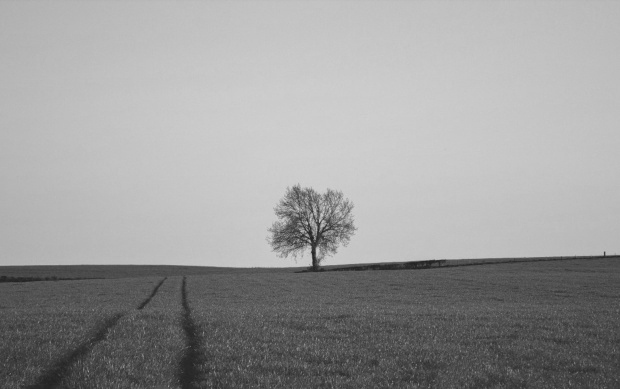

In [4]:
img = cv2.imread("/content/imgs/paisagem01.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(img)

## Utilização

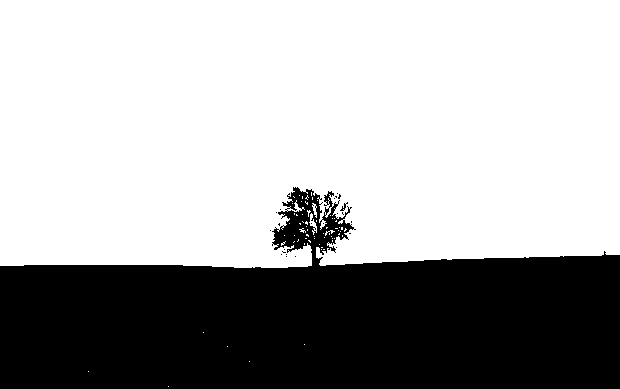

In [5]:
limiar = 140 #@param {type: "slider", min:0, max:255, step:1}
val, trash = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(trash)

### Tipos de Limiarização

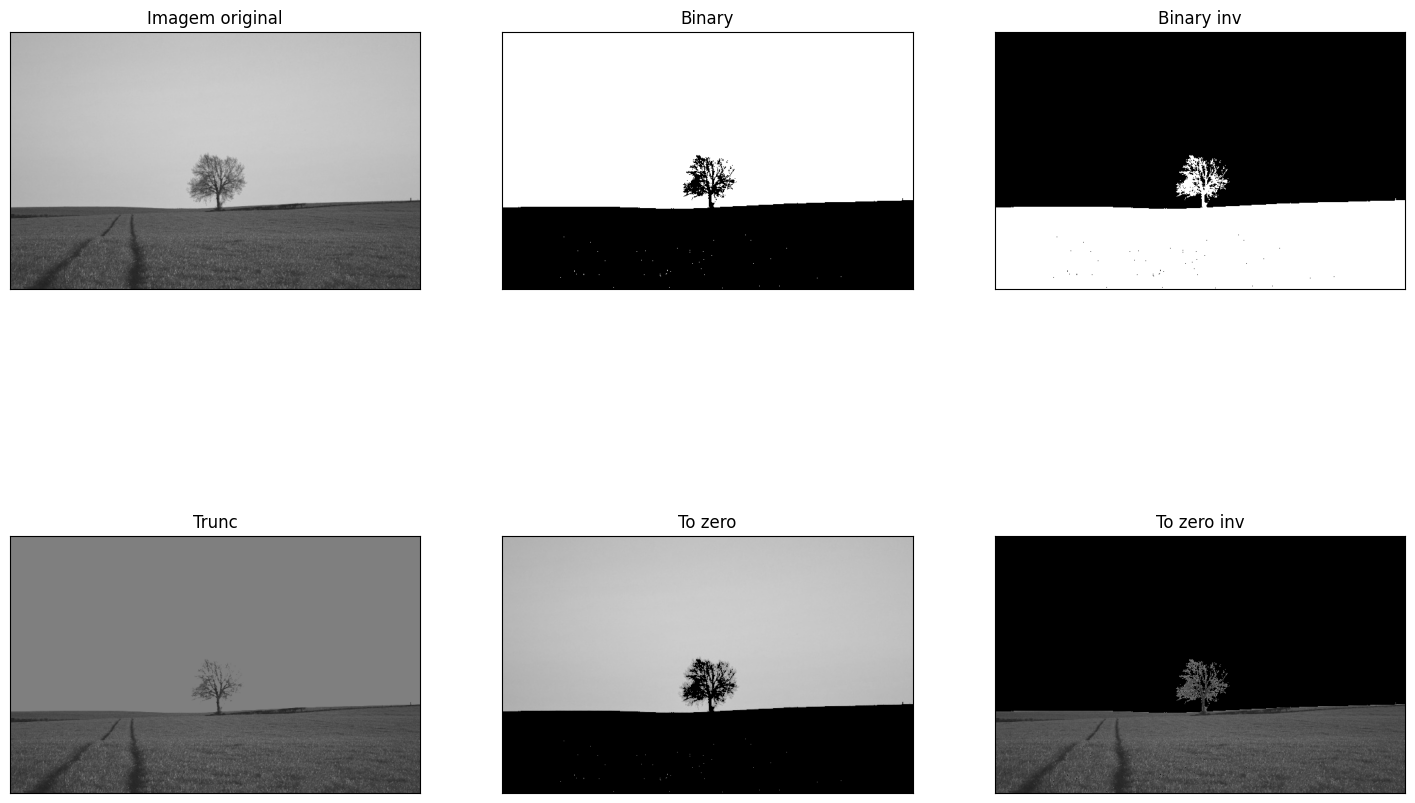

In [6]:
def exibir_limiarizacao(img, limiar = 127):
  _, thresh_binary = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
  _, thresh_binary_inv = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY_INV)
  _, thresh_trunc = cv2.threshold(img, limiar, 255, cv2.THRESH_TRUNC)
  _, thresh_to_zero = cv2.threshold(img, limiar, 255, cv2.THRESH_TOZERO)
  _, thresh_to_zero_inv = cv2.threshold(img, limiar, 255, cv2.THRESH_TOZERO_INV)

  titulos = ['Imagem original', 'Binary', 'Binary inv', 'Trunc', 'To zero', 'To zero inv']
  imagens = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_to_zero, thresh_to_zero_inv]

  fig = plt.gcf()
  fig.set_size_inches(18,12)

  for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap = 'gray')
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])
  plt.show()

exibir_limiarizacao(img)

## Exemplos

### Exemplo com tomografia computadorizada

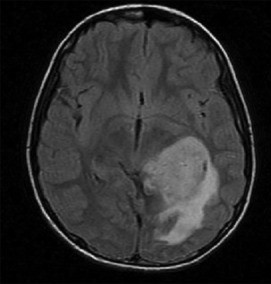

In [7]:
img = cv2.imread("/content/imgs/ct-scan.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

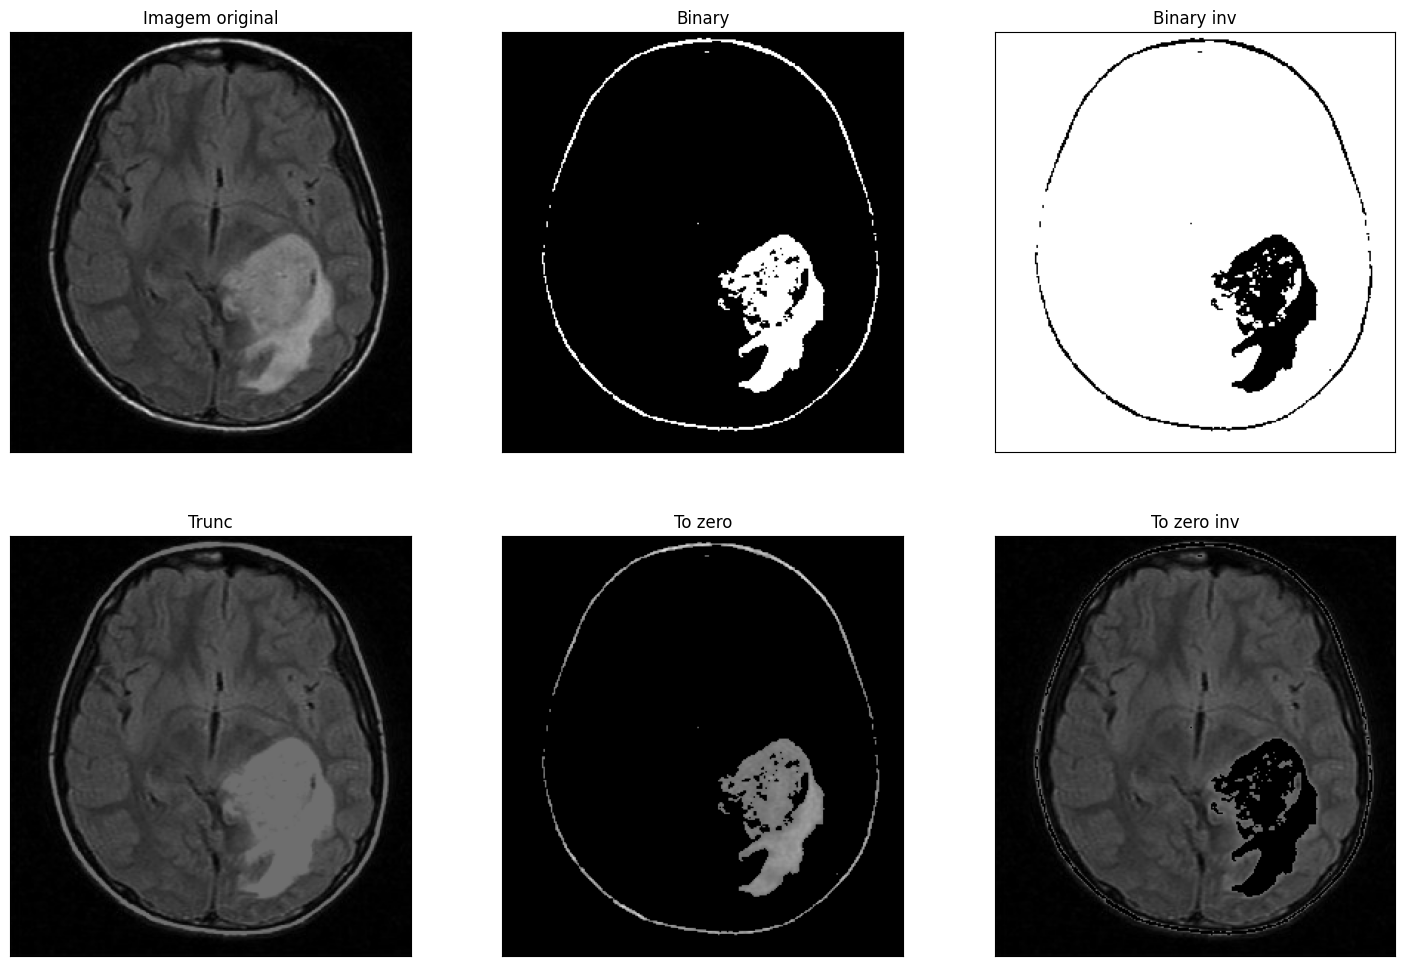

In [8]:
exibir_limiarizacao(img, 110)

## Exemplo com imagem térmica infravermelha

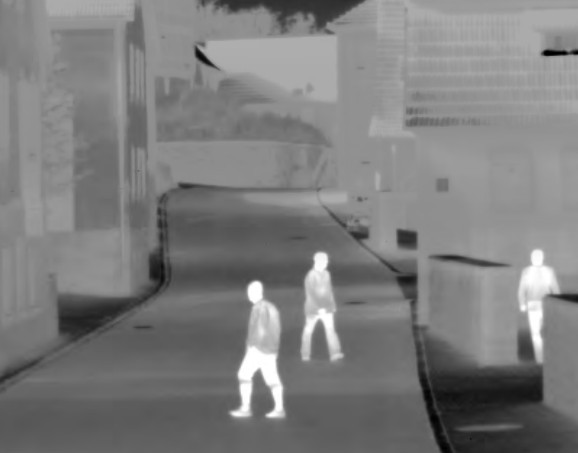

In [9]:
img = cv2.imread("/content/imgs/thermal01.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

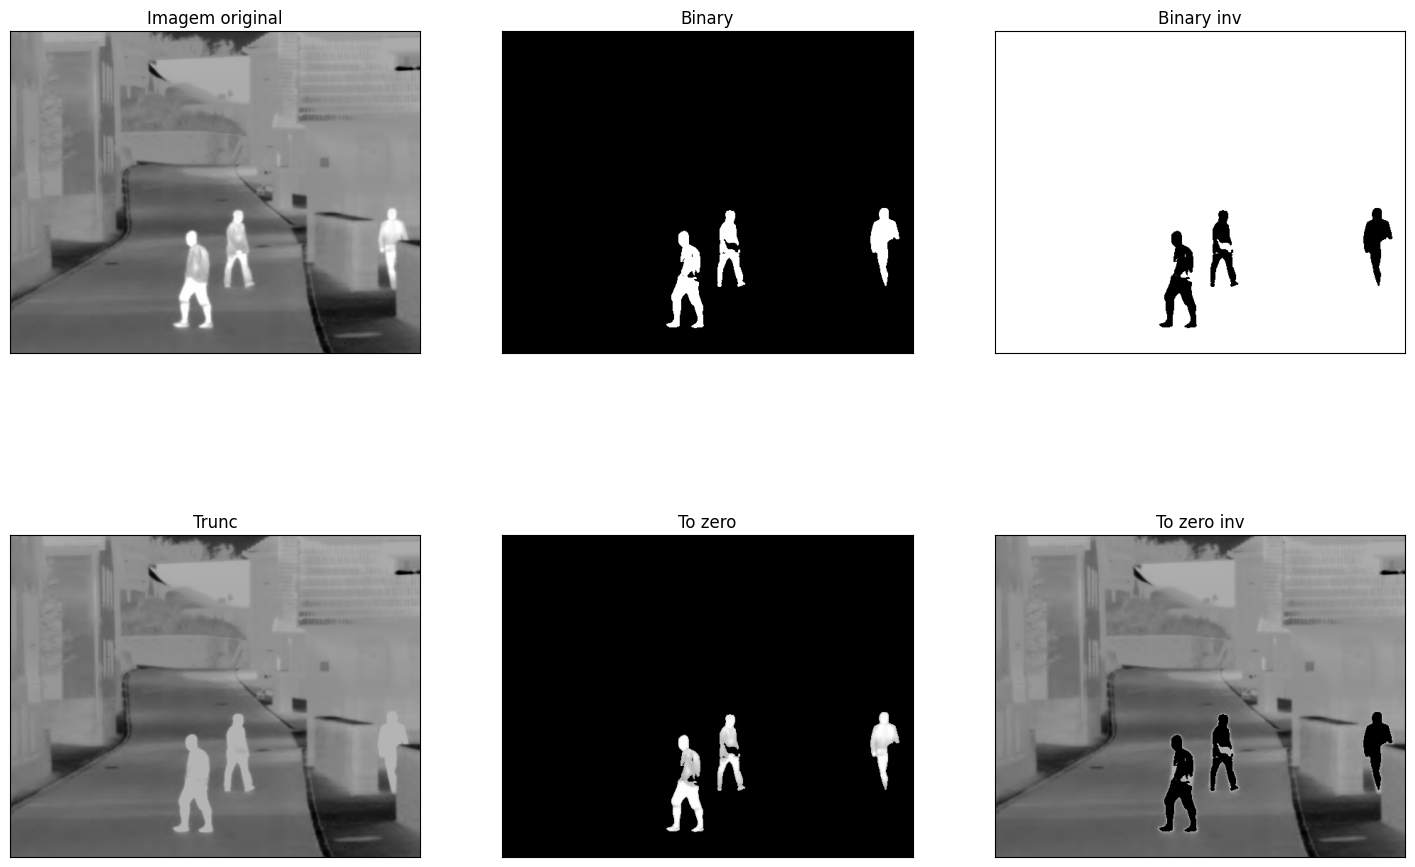

In [10]:
exibir_limiarizacao(img, 180)


## Método de Otsu (*Otsu's method*)

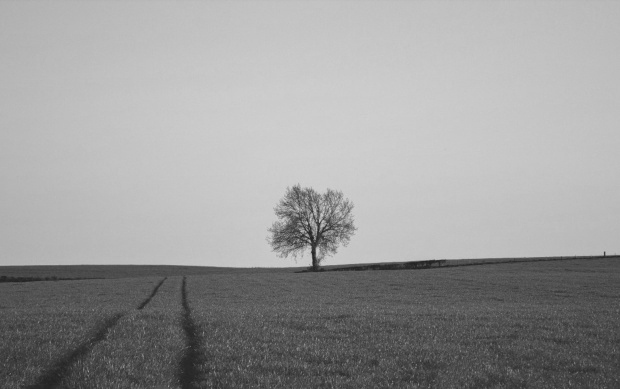

In [12]:
img = cv2.imread("/content/imgs/paisagem01.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(img)

In [13]:
valor, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("Valor limiar Otsu: ", valor)

Valor limiar Otsu:  136.0


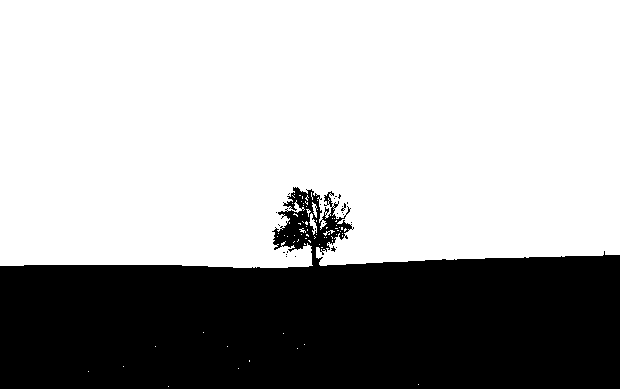

In [14]:
cv2_imshow(otsu)

## Histograma

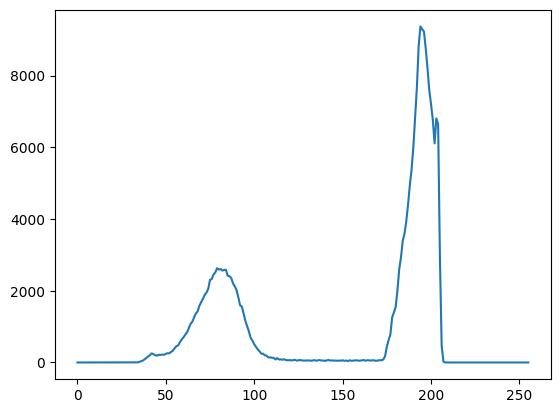

In [17]:
histograma, bin = np.histogram(img, 256, [0,256])
plt.plot(histograma);